In [1]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'



In [3]:
# 다양한 형식의 연, 월, 일 표시 데이터
import pandas as pd
d_list = ["05/07/2024 11:12:13", "05-07-2024 11:22:23","2024-5-07 11:33:23", "2024/05/07"]
pd.DatetimeIndex(d_list)
pd.DatetimeIndex(d_list).year # 연도 값을 출력
pd.DatetimeIndex(d_list).month # 월 값을 출력
pd.DatetimeIndex(d_list).day #일 값을출력

Index([7, 7, 7, 7], dtype='int32')

### [실습]
* 기상 데이터 분석
* 2010년부터 10년간 울룽도 지역의 기온과 풍속을 측정한 데이터

In [34]:
# 데이터 셋 가져오기
#!wget
# 윈도우 : curl
!curl https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/weather.csv -O  weather.csv
weather = pd.read_csv("weather.csv", index_col = 0)
weather.head()


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 88955  100 88955    0     0   284k      0 --:--:-- --:--:-- --:--:--  289k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: weather.csv


,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6


In [35]:
weather.mean()

평균 기온    12.942102
최대 풍속     7.911099
평균 풍속     3.936441
dtype: float64

In [36]:
# 1. 전체 데이터에 대하여 최대 풍속의 최대값을 출력하시오.
weather['최대 풍속'].max()

26.0

In [41]:
# 2. 데이터 정제와 결측 값 처리
# 1. 전체 테이블의 크기
print(weather.size)
# 2. 개별적인 열의 개수 확인 
print(weather.count())
# 3. 결측치 탐지 및 처리
missing_data = weather[weather['평균 풍속'].isna()]
print(missing_data )
#1)
# weather.dropna(axis=0, how='any', inplace=True)

#2) 결측 값을 평균 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
weather.fillna(weather['평균 풍속'].mean(), inplace=True)
weather

18265
일시       3653
평균 기온    3653
최대 풍속    3653
평균 풍속    3653
year     3653
dtype: int64
Empty DataFrame
Columns: [일시, 평균 기온, 최대 풍속, 평균 풍속, year]
Index: []


,일시,평균 기온,최대 풍속,평균 풍속,year
0,2010-08-01,28.7,8.3,3.4,2010
1,2010-08-02,25.2,8.7,3.8,2010
2,2010-08-03,22.1,6.3,2.9,2010
3,2010-08-04,25.3,6.6,4.2,2010
4,2010-08-05,27.2,9.1,5.6,2010
...,...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7,2020
3649,2020-07-28,21.9,4.5,1.6,2020
3650,2020-07-29,21.6,3.2,1.0,2020
3651,2020-07-30,22.9,9.7,2.4,2020


In [38]:
# 3. 평균 기온 열에서 어느 연도에  평균 기온이 가장 높았는지 연도별 평균 기온을 막대그래프로 그리기
weather.head()

,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6


In [39]:
# 3.1 
weather.reset_index(inplace=True)

In [40]:
# 3.2 weather['일시']에서 연도 값을 추출하여 저장해서 데이터프레임에 추가하기
# year 속성을 사용하여 연별로 구분하여 평균 기온 값을 담기

weather['year'] = pd.DatetimeIndex(weather['일시']).year

yearly = [None for x in range(11)] # 연별로 구분된 10개의 None 값
yearly_temp =[0 for x in range(11)] # 연별 평균 기온을 담을 리스트

for i in range(11):
  yearly[i] = weather[weather['year'] == 2010+i]
  yearly_temp[i] = yearly[i]['평균 기온'].mean()

years = np.arange(2010,2021)
plt.bar(years, yearly_wind, color="green")
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()


NameError: name 'yearly_wind' is not defined

In [ ]:
# 4. 어느 월에  평균 기온이 가장 높았는지 월별 평균 기온을 막대그래프로 그리기
# month 속성을 사용하여 달별로 구분하여 평균 기온 값을 담기
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly = [None for x in range(12)] # 별로 구분된 12개의 None 값
monthly_temp =[0 for x in range(12)] # 월별 평균 풍속을 담을 리스트

for i in range(12):
  monthly[i] = weather[weather['month'] == i+1]
  monthly_temp[i] = monthly[i]['평균 기온'].mean()

months = np.arange(1,13)
plt.bar(months, monthly_temp, color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()


In [ ]:
# 5. 데이터 분석을 할 때는 특정한 값에 기반하여 데이터를 그룹으로 묶는 일이 많다.
weather.head()

In [ ]:
# 기상 정보를 월별로 분석하기
## 데이터가 속한 달을 판단해 새로운 열로 만들고, 이 열을 기준으로 데이터를 묶어 평균값 구하기
# weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly_means = weather.groupby('month')[['평균 기온','최대 풍속', '평균 풍속']].mean()
monthly_means

In [ ]:
plt.bar(np.arange(1,13), monthly_means['평균 기온'], color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()

In [ ]:
# 6. 기상 정보를 연도별로 분석하기
# weather['year'] = pd.DatetimeIndex(weather['일시']).year
yearly_means = weather.groupby('year')[['평균 기온','최대 풍속', '평균 풍속']].mean()
yearly_means

In [ ]:
plt.bar(np.arange(2010,2021), yearly_means['평균 기온'], color="green")
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()

In [ ]:
# 필터링 : 특정한 조건 값을 주어서 데이터프레임의 값을 필터링하기
# 7. 평균 풍속이 4.0이 넘는 달만 추출하기
weather.head()

In [ ]:
# weather[weather['평균 풍속'] >= 4.0]
monthly_means.head()
monthly_means[monthly_means['평균 풍속'] >= 4.0]

In [ ]:
# 8. '평균 기온', '최대 풍속', '평균 풍속'을 하나의 히스트그램으로 출력하시오.
# groupby()와 DatetimeIndex().year을 사용

# Calculate the yearly means
#yearly_means = weather.groupby('year')[['평균 기온', '최대 풍속', '평균 풍속']].mean()

# 히스토그램 그리기
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram for average temperature
axs[0].hist(yearly_means['평균 기온'], bins=10, color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("평균 기온")
axs[0].set_ylabel("빈도수")


# Plot the histogram for maximum wind speed
axs[1].hist(yearly_means['최대 풍속'], bins=10, color="green")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("최대 풍속")
axs[1].set_ylabel("빈도수")

# Plot the histogram for average wind speed
axs[2].hist(yearly_means['평균 풍속'], bins=10, color="blue")
axs[2].set_title("연도별 평균 풍속")
axs[2].set_xlabel("평균 풍속")
axs[2].set_ylabel("빈도수")


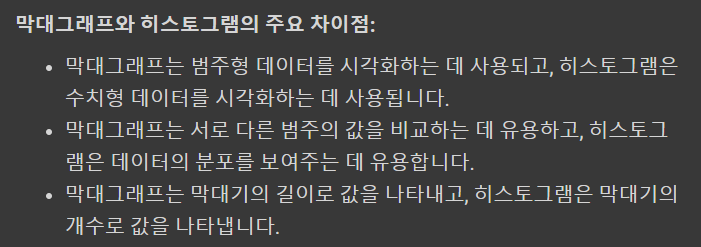

In [ ]:
# 히스토그램 사용 예
import matplotlib.pyplot as plt

# 임의의 데이터 생성
data = np.random.randn(1000)

# 히스토그램 그리기
# plt.hist(data)
plt.hist(data, bins=20) #기본 구간 10개 대신 구간 20개로 히스토그램

# 레이블과 제목 추가
plt.xlabel("값")
plt.ylabel("빈도")
plt.title("임의 데이터의 히스토그램")

# 그래프 표시
plt.show()

In [ ]:
# 한 그림에 여러 개의 히스토그램 그리기:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

data1 = np.random.randn(1000)
data2 = np.random.randn(1000) + 2

axs[0].hist(data1, bins=10, color = "red", label="data2")
axs[0].set_title("data1")
axs[0].set_xlabel("bins")
axs[0].set_ylabel("freq")

axs[1].hist(data2, bins=10, alpha=0.5, label="data 1")
axs[1].set_title("data2")
axs[1].set_xlabel("bins")
axs[1].set_ylabel("freq")

# [2차 프로그래밍 문제]
* 제출날짜: 2024-05-14까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [22]:
print("처음 3개의 행:")
print(weather.head(3))

print("\n마지막 3개의 행:")
print(weather.tail(3))

처음 3개의 행:
            평균 기온  최대 풍속  평균 풍속
일시                             
2010-08-01   28.7    8.3    3.4
2010-08-02   25.2    8.7    3.8
2010-08-03   22.1    6.3    2.9

마지막 3개의 행:
            평균 기온  최대 풍속  평균 풍속
일시                             
2020-07-29   21.6    3.2    1.0
2020-07-30   22.9    9.7    2.4
2020-07-31   25.7    4.8    2.5


## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오


In [24]:
specific_day = weather.loc['2015-06-06']

# '평균 기온'과 '풍속' 정보를 출력합니다.
print(specific_day)

평균 기온    16.6
최대 풍속     4.4
평균 풍속     1.9
Name: 2015-06-06, dtype: float64


## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

In [44]:
weather = pd.read_csv("weather.csv", index_col=0)

# '평균 기온'에서 최대값 찾기
max_avg_temp = weather['평균 기온'].max()

# '평균 기온'이 최대값인 날의 데이터 찾기
hottest_day_data = weather[weather['평균 기온'] == max_avg_temp]

# 가장 더웠던 날의 기상 데이터 출력
print("가장 온도가 높았던 날의 기상 데이터:")
print(hottest_day_data)

가장 온도가 높았던 날의 기상 데이터:
            평균 기온  최대 풍속  평균 풍속
일시                             
2013-08-08   31.3    7.8    4.6


## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [45]:
# CSV 파일 로드
weather = pd.read_csv("weather.csv", index_col=0)

# '평균 기온'이 30도를 넘는 날짜들의 데이터 필터링
hot_days_data = weather[weather['평균 기온'] > 30]

# 해당하는 날짜들의 기상 데이터 출력
print("평균 기온이 30도를 넘는 날짜들의 기상 데이터:")
print(hot_days_data)

평균 기온이 30도를 넘는 날짜들의 기상 데이터:
            평균 기온  최대 풍속  평균 풍속
일시                             
2013-08-08   31.3    7.8    4.6
2013-08-09   30.6    9.9    6.4
2013-08-10   30.6    7.4    3.8
2018-07-23   30.5    6.5    1.6
2018-08-04   30.3    5.8    3.0


## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

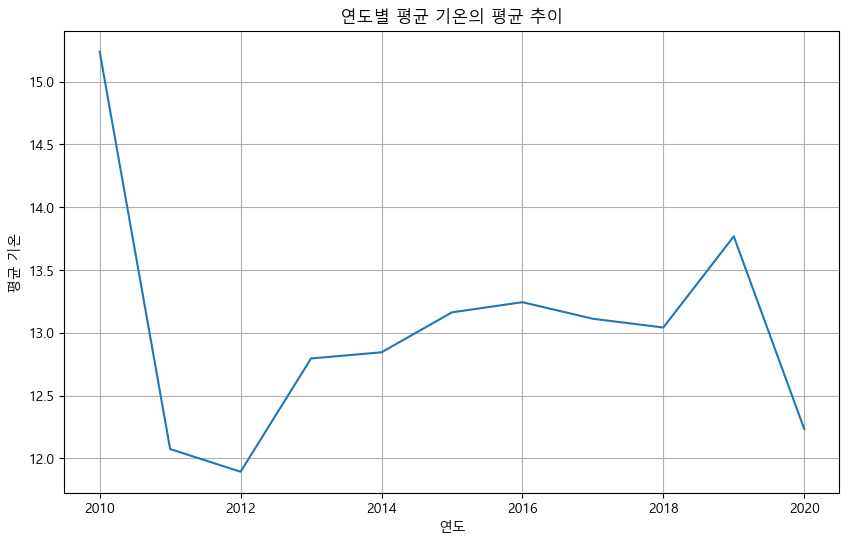

In [48]:
# CSV 파일 로드
weather = pd.read_csv("weather.csv")

# '일시' 열을 datetime 타입으로 변환
weather['일시'] = pd.to_datetime(weather['일시'])

# '일시' 열에서 연도를 추출하여 새로운 열로 추가
weather['연도'] = weather['일시'].dt.year

# 연도별로 데이터를 그룹화하고, 각 그룹의 '평균 기온'의 평균을 계산
yearly_avg_temp = weather.groupby('연도')['평균 기온'].mean()

# 연도별 '평균 기온'의 평균을 선 그래프로 그림
plt.figure(figsize=(10, 6))
yearly_avg_temp.plot(kind='line')
plt.title('연도별 평균 기온의 평균 추이')
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.grid(True)
plt.show()

## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

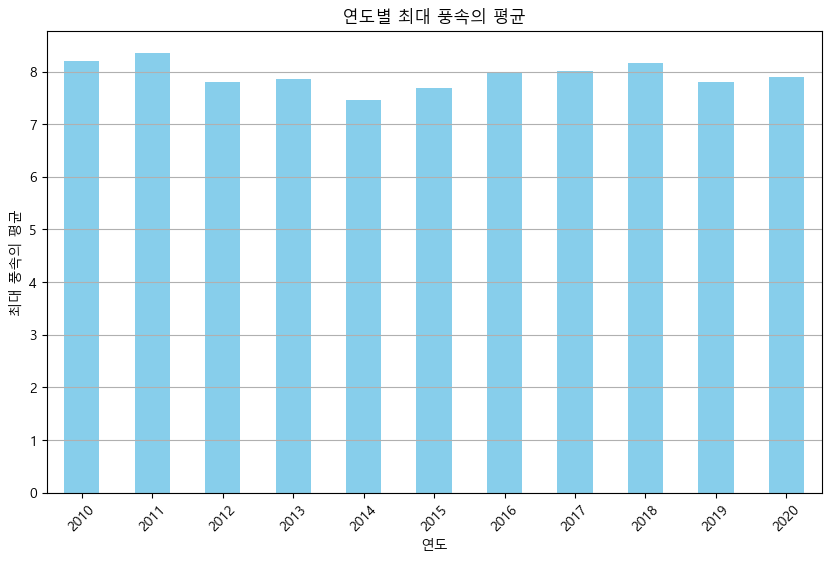

In [49]:
# CSV 파일 로드
weather = pd.read_csv("weather.csv")

# '일시' 열을 datetime 타입으로 변환
weather['일시'] = pd.to_datetime(weather['일시'])

# '일시' 열에서 연도를 추출하여 새로운 열로 추가
weather['연도'] = weather['일시'].dt.year

# 연도별로 데이터를 그룹화하고, 각 그룹의 '최대 풍속'의 평균을 계산
yearly_avg_max_wind_speed = weather.groupby('연도')['최대 풍속'].mean()

# 연도별 '최대 풍속'의 평균을 막대 그래프로 그림
plt.figure(figsize=(10, 6))
yearly_avg_max_wind_speed.plot(kind='bar', color='skyblue')
plt.title('연도별 최대 풍속의 평균')
plt.xlabel('연도')
plt.ylabel('최대 풍속의 평균')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오


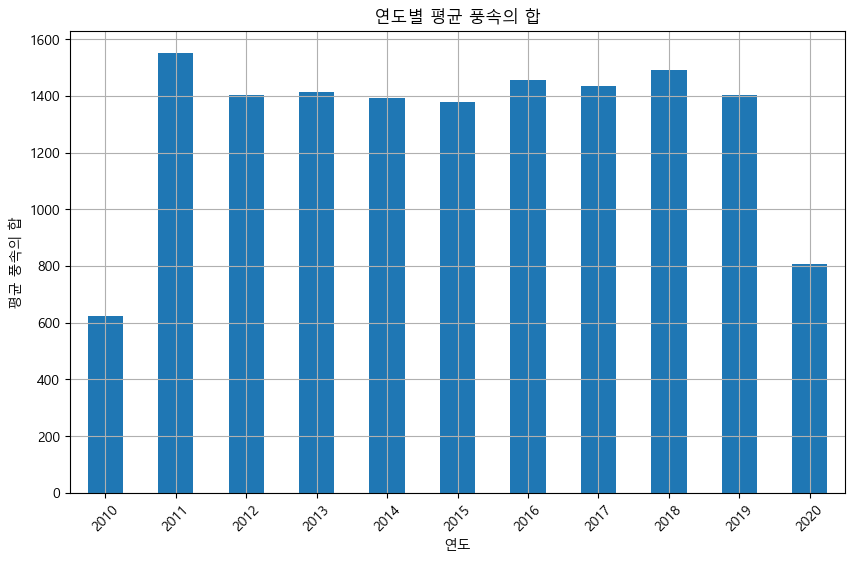

In [50]:
# CSV 파일 로드
weather = pd.read_csv("weather.csv")

# '일시' 열을 datetime 타입으로 변환
weather['일시'] = pd.to_datetime(weather['일시'])

# '일시' 열에서 연도를 추출하여 새로운 열로 추가
weather['연도'] = weather['일시'].dt.year

# 연도별로 데이터를 그룹화하고, 각 그룹의 '평균 풍속'의 합을 계산
yearly_sum_wind_speed = weather.groupby('연도')['평균 풍속'].sum()

# 연도별 '평균 풍속'의 합을 히스토그램으로 그림
plt.figure(figsize=(10, 6))
yearly_sum_wind_speed.plot(kind='bar')
plt.title('연도별 평균 풍속의 합')
plt.xlabel('연도')
plt.ylabel('평균 풍속의 합')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

In [53]:
# CSV 파일 로드
df = pd.read_csv('weather.csv')

# '날짜' 열을 datetime 타입으로 변경
df['일시'] = pd.to_datetime(df['일시'])

# '날짜' 열에서 연도를 추출하여 새로운 열로 추가
df['연도'] = df['일시'].dt.year

# 2015년과 2016년 데이터 필터링
df_2015 = df[df['연도'] == 2015]
df_2016 = df[df['연도'] == 2016]

# 2015년과 2016년의 평균 기온의 평균 계산
avg_temp_2015 = df_2015['평균 기온'].mean()
avg_temp_2016 = df_2016['평균 기온'].mean()

# 결과 비교 및 출력
if avg_temp_2015 > avg_temp_2016:
    print("2015년이 2016년보다 더 더웠습니다.")
elif avg_temp_2015 < avg_temp_2016:
    print("2016년이 2015년보다 더 더웠습니다.")
else:
    print("2015년과 2016년의 평균 기온이 같습니다.")

2016년이 2015년보다 더 더웠습니다.


## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

In [54]:
# CSV 파일 로드
df = pd.read_csv('weather.csv')

# '날짜' 열을 datetime 타입으로 변경
df['일시'] = pd.to_datetime(df['일시'])

# '날짜' 열에서 월 정보를 추출하여 새로운 열로 추가
df['월'] = df['일시'].dt.month

# 월별 '평균 기온'의 합 계산
monthly_avg_temp_sum = df.groupby('월')['평균 기온'].sum()

# 가장 적은 달과 가장 많은 달 찾기
min_temp_month = monthly_avg_temp_sum.idxmin()
max_temp_month = monthly_avg_temp_sum.idxmax()

# 결과 출력
print(f"가장 적은 달: {min_temp_month}, 가장 많은 달: {max_temp_month}")

가장 적은 달: 1, 가장 많은 달: 8


## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.

In [55]:
# CSV 파일 불러오기
df = pd.read_csv('weather.csv')

# '날짜' 열을 datetime 타입으로 변환
df['일시'] = pd.to_datetime(df['일시'])

# '날짜' 열에서 연도 정보 추출하여 새로운 열 추가
df['연도'] = df['일시'].dt.year

# 각 연도별로 '최대 풍속'의 평균 계산
yearly_max_wind_speed_avg = df.groupby('연도')['최대 풍속'].mean()

# 평균이 가장 큰 연도 찾기
max_avg_wind_speed_year = yearly_max_wind_speed_avg.idxmax()

# 결과 출력
print(f"최대 풍속의 평균이 가장 큰 연도는 {max_avg_wind_speed_year}년입니다.")

최대 풍속의 평균이 가장 큰 연도는 2011년입니다.
